In [1]:
#Context:
#The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. 
#In this dataset, each entry represents a person who takes a credit by a bank. 
#Each person is classified as good or bad credit risks according to the set of attributes. 
 

#--Variable List--
 
#Age (numeric)
#Sex (text: male, female)
#Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
#Housing (text: own, rent, or free)
#Saving accounts (text - little, moderate, quite rich, rich)
#Checking account (numeric, in DM - Deutsch Mark)
#Credit amount (numeric, in DM)
#Duration (numeric, in month)
#Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
#Risk (Value target - Good or Bad Risk)

#--1.IMPORTING lIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
import seaborn as sns
%matplotlib inline

In [ ]:
#--2.IMPORTING DATA AND VIEW

df = pd.read_csv('/Users/manimohan/Downloads/german_credit_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(10)


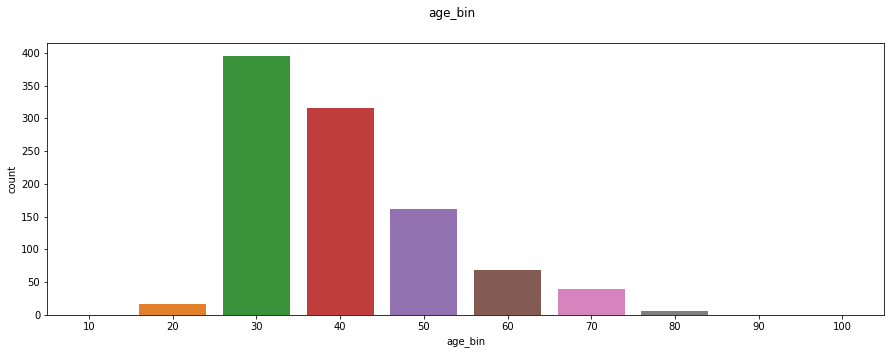

Risk     bad  good   All
age_bin                 
70         6    10    16
30       142   253   395
50        80   235   315
60        41   120   161
40        21    47    68
20         9    30    39
80         1     5     6
All      300   700  1000
------------Gender---------


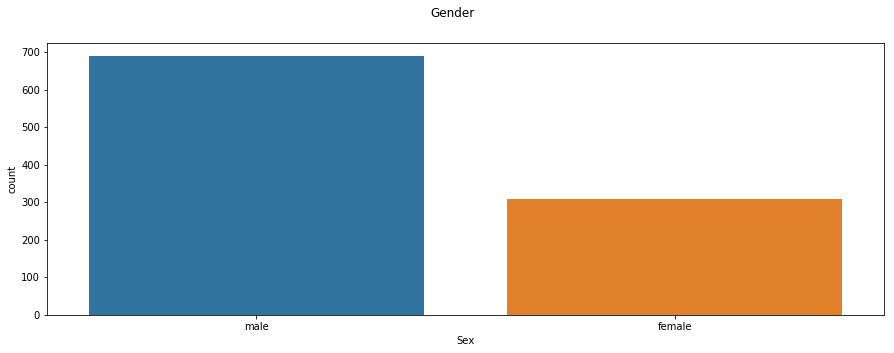

Risk    bad  good   All
Sex                    
female  109   201   310
male    191   499   690
All     300   700  1000
------------job------------


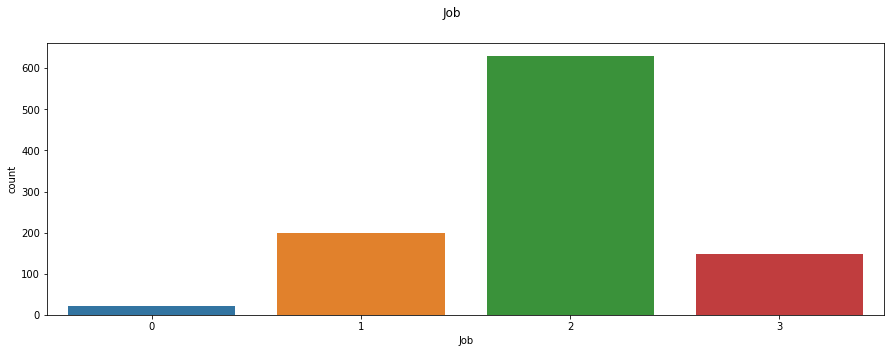

Risk  bad  good   All
Job                  
0       7    15    22
1      56   144   200
2     186   444   630
3      51    97   148
All   300   700  1000
------------Housing--------


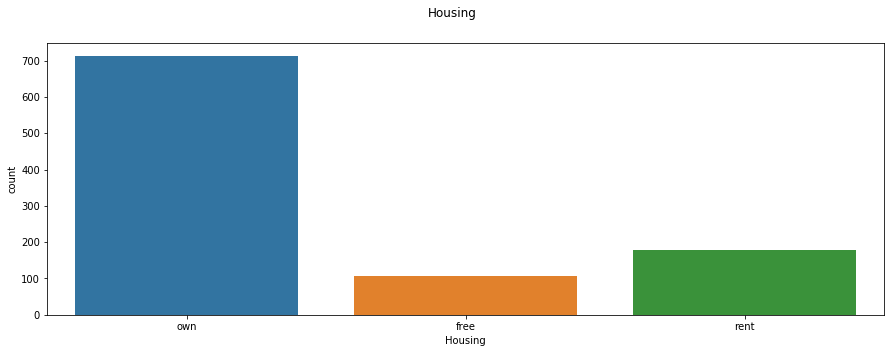

Risk     bad  good   All
Housing                 
free      44    64   108
own      186   527   713
rent      70   109   179
All      300   700  1000
------------Purpose--------


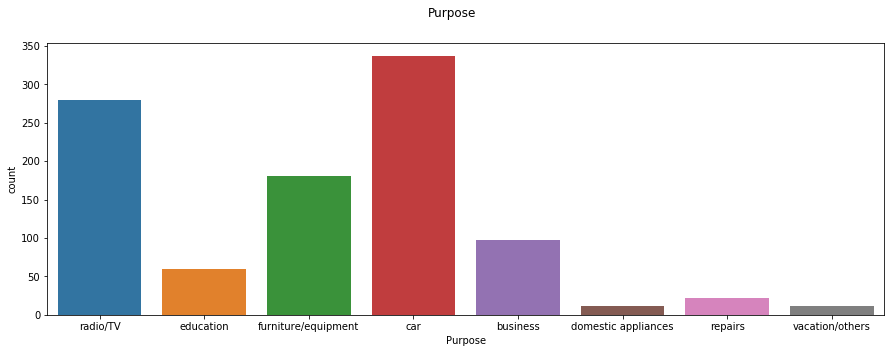

Risk                 bad  good   All
Purpose                             
business              34    63    97
car                  106   231   337
domestic appliances    4     8    12
education             23    36    59
furniture/equipment   58   123   181
radio/TV              62   218   280
repairs                8    14    22
vacation/others        5     7    12
All                  300   700  1000


In [94]:
#--3.Univariate Data Analysis

#I binned the age coulmn into bins of 10.

df['age_bin'] = pd.cut(df['Age'], [0, 10, 20,30,40,50,60,70,80,90,100], labels=['10','20','30','40','50','60','70','80','90','100'])
plt.figure(0 , figsize = (15 , 5))
sns.countplot(x = 'age_bin' , data = df)
suptitle("age_bin")
plt.show()
print(pd.crosstab(df['age_bin'],df['Risk'],margins=True))


#Count Plot of each variables and their corresponding relation with risk is found below.


print('/n/n/n')

print('------------Gender---------')
plt.figure(0 , figsize = (15 , 5))
sns.countplot(x = 'Sex' , data = df)
suptitle("Gender")
plt.show()
print(pd.crosstab(df['Sex'],df['Risk'],margins=True))
print('------------job------------')
plt.figure(0 , figsize = (15 , 5))
sns.countplot(x = 'Job' , data = df)
suptitle("Job")
plt.show()
print(pd.crosstab(df['Job'],df['Risk'],margins=True))
print('------------Housing--------')
plt.figure(0 , figsize = (15 , 5))
sns.countplot(x = 'Housing' , data = df)
suptitle("Housing")
plt.show()
print(pd.crosstab(df['Housing'],df['Risk'],margins=True))
print('------------Purpose--------')
plt.figure(0 , figsize = (15 , 5))
sns.countplot(x = 'Purpose' , data = df)
suptitle("Purpose")
plt.show()
print(pd.crosstab(df['Purpose'],df['Risk'],margins=True))

#--4.Univariate Analysis Insights:
#Risk:
  #There are total of 1000 records with a 30:70 bad to good ratio
#Age:
  #Age group and their chance of bad risk:
    #20-30 - 36% chance of bad risk
    #30-40 - 31% chance of bad risk
    #40-50 - 25% chance of bad risk
    #60-70 - 25% chance of bad risk
#Gender:
  #There is a 30:70 ratio between men and women
  #Propotion of Men compared to women is higher and also Women have higher bad rating than men.
  #Among Females there is a 36% chance of bad risk.
  #Among Males ther is a 30% chance of bad risk
#Housing:
  #People who own a house have the lowest risk percentage(26%).
  #The rest People who rent/free have 40% bad risk.
#Purpose:
  #Top 3 reasons for Loan and their chance of bad risk:
    #-Car -34% of bad risk
    #-Furniture -18% of bad risk
    #-Radio/Tv -28% of bad risk
  #Top reasons with highest chance of bad risk:
    #Education being only 6% of the total it has a 39% chance of bad risk.
    #Repairs being less than 2% of the total it has a 36% chance of bad risk.



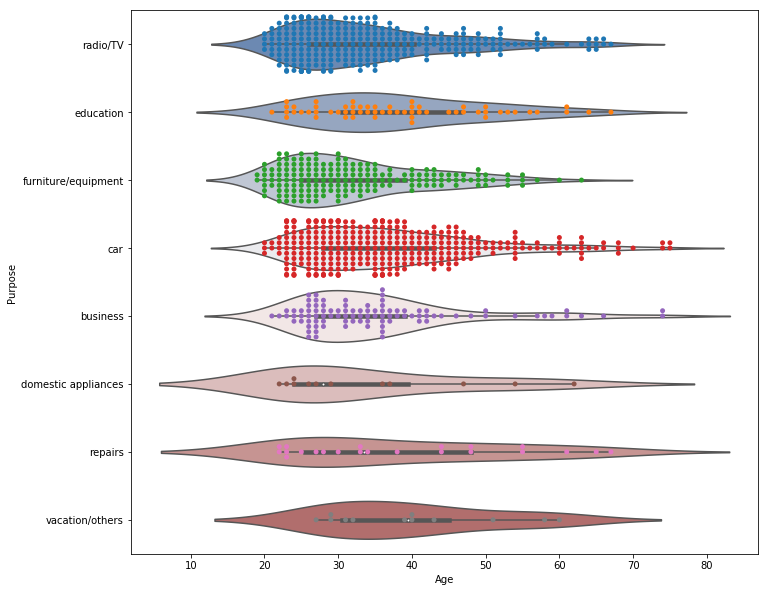

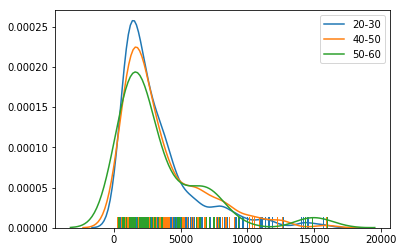

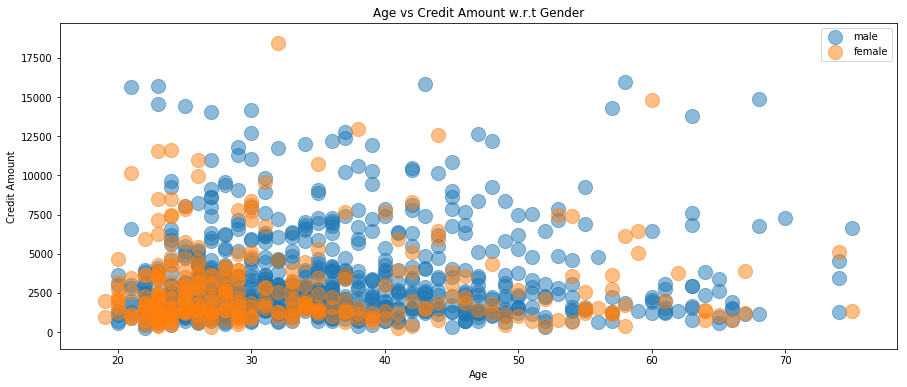

0.34523809523809523
0.2374429223744292
0.4111111111111111
0.32727272727272727


In [126]:
#--5.Bivariate Analysis

#Age vs Purpose
plt.figure(1 , figsize = (45 , 10))
n = 0 
A
for cols in ['Age']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Purpose' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Purpose' , data = df)
    plt.ylabel('Purpose' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show() 

#--------------------------
#Visualizing the top 3 age group , check to see if amount distribution is different
# Sort the dataframe by target
target_10=df.loc[df['age_bin'] == '10']
target_20=df.loc[df['age_bin'] == '20']
target_30=df.loc[df['age_bin'] == '30']
target_40=df.loc[df['age_bin'] == '40']
target_50=df.loc[df['age_bin'] == '50']
target_60=df.loc[df['age_bin'] == '60']
target_70=df.loc[df['age_bin'] == '70']
target_80=df.loc[df['age_bin'] == '80']
target_90=df.loc[df['age_bin'] == '90']
target_100=df.loc[df['age_bin'] == '100']

#Getting out histogram with distribution and overlapping them to one.
sns.distplot(target_30[['Credit amount']], hist=False, rug=True, fit_kws={"color":"brown"}, label='20-30')
sns.distplot(target_50[['Credit amount']], hist=False, rug=True, fit_kws={"color":"blue"},label='40-50')
sns.distplot(target_60[['Credit amount']], hist=False, rug=True, fit_kws={"color":"green"},label='50-60')
plt.show()

#--------------------------------------
#Age vs Credit Amount w.r.t Gender
plt.figure(1 , figsize = (15 , 6))
for sex in ['male' , 'female']:
    plt.scatter(x = 'Age' , y = 'Credit amount' , data = df[df['Sex'] == sex] ,
                s = 200 , alpha = 0.5 , label = sex)
plt.xlabel('Age'), plt.ylabel('Credit Amount') 
plt.title('Age vs Credit Amount w.r.t Gender')
plt.legend()
plt.show()



#--6.Bivariate Analysis Insights:

#-- From the Swarmplots--
#Top 4 purpose: 
    #Furniture(Prominent in 30-40 age category)
    #TV (Prominent in 30-40 age category)
    #Car(Prominent in 30-50 age category)
    #Business(Prominent in 25-35 age category)
#The least popular: 
    #Domestic appliance(Prominent in 20-30 age category)
    #Repairs(Evenly Distributed)
    #Vacation(Prominent in 30-40 age category)


#40-50 and 50-60 age group have a long tailed loan amount distribution.
#Hints that few 40-60 years customers apply for bigger loan amount.


#--From the dot plot--
#Male
#proportion of men avaialing more than the average loan=36%
# Proportion of high risk men customers who avail loan more than avg=(87/252)=35%
# Proportion of high risk men customers who avail loan less than avg=(104/438)=23%

#Female
#proportion of men avaialing more than avg loan=29%
# Proportion of high risk female customers who avail loan more than avg=41%
# Proportion of high risk female customers who avail loan less than avg=32%



print(df.loc[(df['Sex']=='male')&(df['Credit amount']>df['Credit amount'].mean())&(df['Risk']=='bad'),'Age'].count()/df.loc[(df['Sex']=='male')&(df['Credit amount']>df['Credit amount'].mean()),'Age'].count())
print(df.loc[(df['Sex']=='male')&(df['Credit amount']<df['Credit amount'].mean())&(df['Risk']=='bad'),'Age'].count()/df.loc[(df['Sex']=='male')&(df['Credit amount']<df['Credit amount'].mean()),'Age'].count())
print(df.loc[(df['Sex']=='female')&(df['Credit amount']>df['Credit amount'].mean())&(df['Risk']=='bad'),'Age'].count()/df.loc[(df['Sex']=='female')&(df['Credit amount']>df['Credit amount'].mean()),'Age'].count())
print(df.loc[(df['Sex']=='female')&(df['Credit amount']<df['Credit amount'].mean())&(df['Risk']=='bad'),'Age'].count()/df.loc[(df['Sex']=='female')&(df['Credit amount']<df['Credit amount'].mean()),'Age'].count())






In [136]:
#--5.Data analysis & preprocessing

#-------------------------------------------
#Missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
plt.show()

#Comments: Checking and saving account has less then 1% missing values. 
#Action: Fill up with the most common values (Mode)

df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode()[0])

#------------------------------------------
# Categorical encoding
#Method: Check unique values in Saving accounts/Checking account/Sex/Housing/Purpose

df['Saving accounts'].unique()
#array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

df['Checking account'].unique()
#array(['little', 'moderate', 'rich'], dtype=object)

df['Sex'].unique()
#array(['male', 'female'], dtype=object)

df['Housing'].unique()
#array(['own', 'free', 'rent'], dtype=object)

df['Saving accounts'].unique()
#array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others'], dtype=object)

#Action
df['Saving accounts'] = df['Saving accounts'].map({"little":0,"moderate":1,"quite rich":2 ,"rich":3 });
df['Checking account'] = df['Checking account'].map({"little":0,"moderate":1,"rich":2 });
df['Sex'] = df['Sex'].map({"male":0,"female":1}).astype(int);
df['Housing'] = df['Housing'].map({"own":0,"free":1,"rent":2}).astype(int);
df['Purpose'] = df['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}).astype(int);

#---------------------------------------------------
#Encoding dependent variable
df['Risk'] = df['Risk'].map({"good":0,"bad":1}).astype(int)





/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


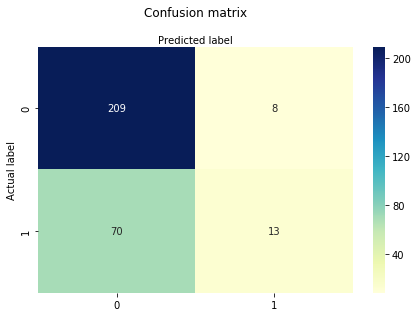

Accuracy: 0.74
Precision: 0.6190476190476191
Recall: 0.1566265060240964


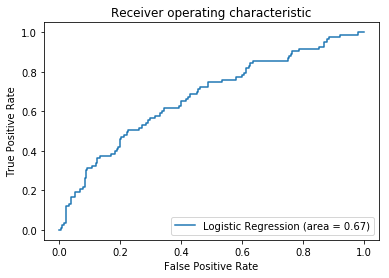

In [167]:
#--6.Model Building
#-----------------------------Logistic---------------------------------

X = df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']]
y = df['Risk']

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#call logistic regression module
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

#confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#Model Evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

#AUC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()




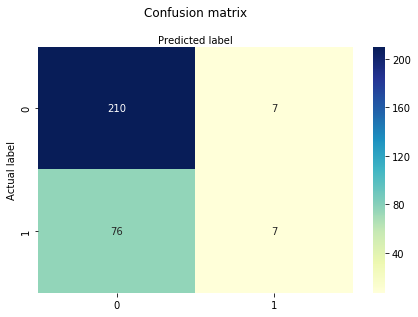

Accuracy: 0.7233333333333334
Precision: 0.5
Recall: 0.08433734939759036
------------------
Lasso model: 0.005 * Duration + -0.003 * Age + 0.0 * Credit amount + 0.0 * Sex + -0.0 * Job + 0.0 * Housing + -0.0 * Saving accounts + 0.0 * Checking account + 0.0 * Purpose
------------------


In [186]:
#-----------------------------LASSO---------------------------------




X = df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']]
y = df['Risk']

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#call logistic regression module
from sklearn.linear_model import Lasso
logreg = Lasso(alpha=.1)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)


#confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred.round())
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#Model Evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))
print("Precision:",metrics.precision_score(y_test, y_pred.round()))
print("Recall:",metrics.recall_score(y_test, y_pred.round()))

def pretty_print_linear(coefs, names=None, sort=False):
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                      for coef, name in lst)

print('------------------')
print("Lasso model:", pretty_print_linear(logreg.coef_,names=X.columns, sort=True))
print('------------------')



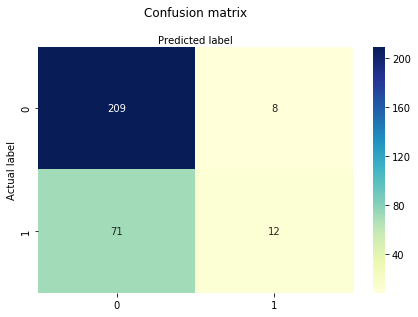

Accuracy: 0.7366666666666667
Precision: 0.6
Recall: 0.14457831325301204
------------------
Lasso model: 0.065 * Housing + 0.061 * Sex + -0.038 * Saving accounts + 0.036 * Checking account + -0.016 * Job + 0.01 * Purpose + 0.007 * Duration + -0.003 * Age + 0.0 * Credit amount
------------------


In [189]:
#-----------------------------Ridge---------------------------------

X = df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']]
y = df['Risk']

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

#call logistic regression module
from sklearn.linear_model import Ridge
logreg = Ridge(alpha=.3)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)


#confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred.round())
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#Model Evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))
print("Precision:",metrics.precision_score(y_test, y_pred.round()))
print("Recall:",metrics.recall_score(y_test, y_pred.round()))

def pretty_print_linear(coefs, names=None, sort=False):
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key=lambda x: -np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                      for coef, name in lst)

print('------------------')
print("Ridge model:", pretty_print_linear(logreg.coef_,names=X.columns, sort=True))
print('------------------')



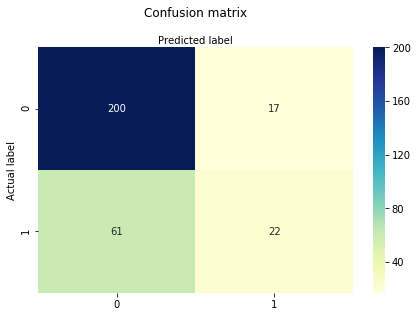

Accuracy: 0.74
Precision: 0.5641025641025641
Recall: 0.26506024096385544


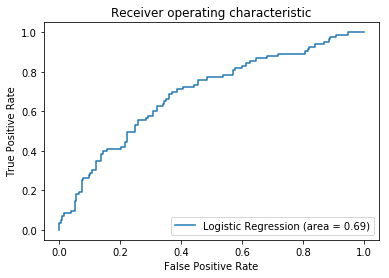

In [196]:
#-----------------------------Random Forest---------------------------------
from sklearn.ensemble import RandomForestClassifier
logreg = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

#confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#Model Evaluation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

#AUC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()




